## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

### 練習 目標: Linear Regression 回歸

Reference: https://scikit-learn.org/stable/datasets/index.html

#### 'feature_names':  'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
    CRIM: 按城鎮人均犯罪率
    ZN  : 佔住宅用地的比例超過25,000平方英尺。
    INDUS: 每個城鎮非零售業務佔比的比例
    CHAS: Charles River 虛擬變量（如果管道限制河流則= 1;否則為0）
    NOX: 一氧化氮濃度（每千萬份）
    RM: 每間住宅的平均房間數
    AGE:　在1940年之前建造的自住單位比例
    DIS: 加權距離到波士頓的五個就業中心
    RAD: 徑向高速公路可達性指數
    TAX: 每10,000美元的稅收全價物業稅率
    PTRATIO: 城鎮的師生比例
    B : 1000（Bk - 0.63）^ 2其中Bk是城鎮黑人的比例
    LSTAT: ％人口狀況較低
#### 'target': 
    MEDV: 自住房屋的中位數價值1000美元

In [108]:
boston = datasets.load_boston()
#print(boston)
print(boston.data.shape)
print(boston.target.shape)


(506, 13)
(506,)


In [109]:
Y = boston.target
print("Target shape: ", Y.shape)

Target shape:  (506,)


In [113]:
# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
# 取出　feature_names中的　＂ＲＭ＂ data 當input data X:
X = boston.data[:, np.newaxis, 5]
print("Data shape: ", X.shape)
#print(X)

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

Data shape:  (506, 1)


In [114]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Coefficients:  [9.1333086]
Mean squared error: 50.08


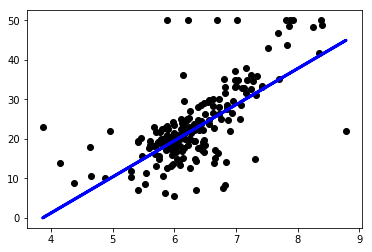

In [115]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

### 練習 目標: Logistics Regression 回歸

Reference: https://scikit-learn.org/stable/datasets/index.html

feature_name: 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'

    alcohol : 醇
    malic_acid: 蘋果酸
    ash: 灰
    alcalinity_of_ash: 灰燼的鹼度
    magnesium: 鎂
    total_phenols: 總酚
    flavanoids: 黃酮
    nonflavanoid_phenols: 非黃烷類酚類
    proanthocyanins: 花青素
    color_intensity: 顏色強度
    hue: 色調
    od280/od315_of_diluted_wines: OD280 / OD315稀釋葡萄酒
    proline: 脯氨酸

In [134]:
wine = datasets.load_wine()
print(wine.feature_names)
print(wine.data.shape)
print(wine.target.shape)
#wine.data

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
(178, 13)
(178,)


In [135]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

In [136]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9722222222222222
